# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Exploración de los datos](#exploracion_datos)
    * [Inicialización](#inicializacion) 
    * [Cargar los datos](#cargar)
* [Etapa 2. Preparar los datos](#preparar)
    * [Planes](#planes)
    * [Usuarios](#usuarios)
     * [Conclusiones y siguientes pasos](#conclusiones_usuarios)
     * [Corregir datos](#corregir_usuarios)
     * [Enriqueser datos](#enriquecer_usuarios)
    * [Llamadas](#llamadas)
     * [Conclusiones y siguientes pasos](#conclusiones_llamadas)
     * [Corregir datos](#corregir_llamadas)
     * [Enriqueser datos](#enriquecer_llamadas)
    * [Mensajes](#mensajes)
     * [Conclusiones y siguientes pasos](#conclusiones_mensajes)
     * [Corregir datos](#corregir_mensajes)
     * [Enriqueser datos](#enriquecer_mensajes)
    * [Internet](#internet)
     * [Conclusiones y siguientes pasos](#conclusiones_internet)
     * [Corregir datos](#corregir_internet)
     * [Enriqueser datos](#enriquecer_internet)
* [Etapa 3. Estudiar condiciones de los planes](#estudiar_condiciones)
* [Etapa 4. Agregar datos por usuario](#agregar)
* [Etapa 5. Estudiar el comportamiento del usuario](#estudiar)
    * [Llamadas](#llamadas_usuarios)
    * [Mensajes](#mensajes_usuarios)
    * [Internet](#internet_usuarios)
* [Etapa 6. Descripción del ingreso entre los planes](#descripcion)
* [Etapa 7. Hipótesis estadísticas](#hipotesis)
    * [Hipótesis 1: ¿Es diferente el ingreso promedio de los usuarios de los planes de llamada Ultimate y Surf?](#hipotesis_1)
    * [Hipótesis 2: ¿el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones?](#hipotesis_2)
* [Conclusión general](#general)
           

# ¿Cuál es un mejor plan? <a id='intro'></a>

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Este proyecto tiene como propósito determinar cual de las tarifas de prepago entre Surf y Ultimate, le genera mas ingresos a la compañía, la información con la que se cuenta para el estudio son los datos de 500 clientes de Megaline donde se especifica la tarifa que tienen contratada, la cantidad de llamadas, cantidad de mensajes de texto que enviaron a lo largo del año 2018, Se van a tratar los valores ausentes, corregir los tipos de datos, hacer comprobaciones con los datos limpios, estudiar comportamientos de los usuarios, probar algunas hipótesis para luego determinar las conclusiones del estudio. 


## Inicialización <a id='inicializacion'></a>

In [2]:
# Cargar todas las librerías

import pandas as pd 
from datetime import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Cargar los datos <a id='cargar'></a>

In [3]:
# Carga los archivos de datos en diferentes DataFrames

plans= pd.read_csv('/datasets/megaline_plans.csv')
users= pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv') 
messages= pd.read_csv('/datasets/megaline_messages.csv') 
internet= pd.read_csv('/datasets/megaline_internet.csv') 


## Preparar los datos <a id='preparar'></a>

## Planes <a id='planes'></a>

In [4]:
# Imprime la información general/resumen sobre el DataFrame de los planes
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprime una muestra de los datos para los planes
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


El dataset plans contiene los siguientes campos:

- `messages_included` — SMS incluidos al mes 
- `mb_per_month_included` — datos incluidos al mes (en megabytes)        
- `minutes_included`  — minutos incluidos al mes     
- `usd_monthly_pay` — pago mensual en dólares estadounidenses        
- `usd_per_gb`  — Precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)            - `usd_per_message` — precio por SMS tras exceder los límites del paquete        
- `usd_per_minute` —  precio por minuto tras exceder los límites del paquete       
- `plan_name` — nombre de la tarifa     

Tenemos un conjunto de datos conformado por 8 columnas y 2 filas, no se necesita ajustar tipos de datos y tampoco tiene valores ausentes, solo se cambiará el nombre de la columna plan_name a plan para relacionar con las otras tablas.  

In [6]:
# Cambiar nombre de columna plan_name
plans.columns=['messages_included','mb_per_month_included','minutes_included','usd_monthly_pay','usd_per_gb','usd_per_message','usd_per_minute','plan']
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan                   2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


## Usuarios <a id='usuarios'></a>

In [7]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de los datos para los usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


El dataset users contiene los siguientes campos:

- `user_id` — identificador único del usuario     
- `first_name`  — nombre del usuario
- `last_name`  — apellido del usuario 
- `age` — edad del usuario (en años)   
- `city` — ciudad de residencia del usuario       
- `reg_date` — fecha de suscripción (dd, mm, aa)  
- `plan` — nombre de la tarifa       
- `churn_date` — la fecha en que el usuario dejó de usar el servicio

Tenemos un conjunto de datos conformado por 8 columnas, en algunas se necesita ajustar su tipo de dato y la columna churn_date tiene valores ausentes, además tiene 500 filas lo que es correcto ya que el estudio se realiza con la información de 500 clientes. 

 ### Conclusiones y siguientes pasos <a id='conclusiones_usuarios'></a>

En vista que los datos presentan algunos problemas que deben ser tratados, la columna churn_date tiene una gran cantidad de valores ausentes pero se puede intuir que esto se debe a que los que no cuentan con este dato es porque eran usuarios activos al momento de la toma de la muestra por lo que se dejará vacio y en base a esto podemos enriquecer los datos con una columna donde se especifique si el cliente está activo o no lo está, además se modificará el tipo de datos de las columnas reg_date y churn_date al tipo datetime.  

### Corregir datos <a id='corregir_usuarios'></a>

In [9]:
# ver valores ausentes
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [10]:
# Comprobar la tabla sin los valores ausentes reemplazados
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [11]:
# Reemplazar ausentes en la columna churn_date con 0000-00-00
fecha= '0000-00-00'
users.fillna({'churn_date': fecha}, inplace=True)

In [12]:
# cambiar tipos de datos
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
#users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [13]:
# actualizar información general
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [14]:
# comprobar la tabla
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0000-00-00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0000-00-00
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0000-00-00
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0000-00-00
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,0000-00-00
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,0000-00-00
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,0000-00-00
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,0000-00-00
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,0000-00-00


### Enriquecer datos <a id='enriquecer_usuarios'></a>

In [15]:
# Agregar columna con la situación actual del usuario 

users['situation']= users["churn_date"].apply(lambda x: 'Inactivo' if x == fecha else 'Activo')
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,situation
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0000-00-00,Inactivo
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0000-00-00,Inactivo
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0000-00-00,Inactivo
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0000-00-00,Inactivo
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,0000-00-00,Inactivo
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,0000-00-00,Inactivo
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,Activo
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,0000-00-00,Inactivo
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,0000-00-00,Inactivo
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,0000-00-00,Inactivo


## Llamadas <a id='llamadas'></a>

In [16]:
# Imprime la información/resumen general sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Imprime una muestra de datos para llamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


El dataset users contiene los siguientes campos:

- `id` — identificador único de la llamada
- `user_id` —  identificador del usuario que realiza la llamada
- `call_date` — fecha de la llamada
- `duration` — duración de la llamada (en minutos)

Tenemos un conjunto de datos conformado por 4 columnas, en las columnas call_date y duration se necesita ajustar su tipo de dato, tiene 137735 filas y no se encontraron valores ausentes.

### Conclusiones y siguientes pasos <a id='conclusiones_llamadas'></a>

El dataset no presenta mayores problemas, se procede a cambiar call_date al tipo Datetime y duration se va a redondear ya que la compañía siempre redondea los segundos a minutos y se va a cambiar al tipo de dato a int, se agrega la columna month para enriquecer los datos y utilizarla para un posterior análisis.   

### Corregir datos <a id='corregir_llamadas'></a>

In [18]:
# cambiar tipos de datos
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [19]:
# actualizar información general
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


### Enriquecer datos <a id='enriquecer_llamadas'></a>

In [20]:
# Agrega columna mounth_calls para saber el mes en el que se realizó la llamada v
calls['month']= pd.DatetimeIndex(calls['call_date']).month

In [21]:
# comprobar la tabla
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


## Mensajes <a id='mensajes'></a>

In [22]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
# Imprime una muestra de datos para los mensajes
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


El dataset messages contiene los siguientes campos:

- `id` — identificador único del SMS
- `user_id` —  el identificador del usuario que manda el SMS
- `message_date` — fecha del SMS

Tenemos un conjunto de datos conformado por 3 columnas, en la columna message_date se necesita ajustar su tipo de dato, tiene 76051 filas y no se encontraron valores ausentes.

 ### Conclusiones y siguientes pasos <a id='conclusiones_mensajes'></a>

El dataset no presenta mayores problemas, se procede a cambiar message_date al tipo Datetime y se agrega la columna month para enriquecer los datos y utilizarla para un posterior análisis.    

### Corregir datos <a id='corregir_mensajes'></a>

In [24]:
# cambiar tipos de datos
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [25]:
# actualizar información general
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer datos <a id='enriquecer_mensajes'></a>

In [26]:
# Agrega columna mounth_calls para saber el mes en el que se realizó la llamada v
messages['month']= pd.DatetimeIndex(messages['message_date']).month

In [27]:
# comprobar la tabla
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet <a id='internet'></a>

In [28]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [29]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


El dataset internet contiene los siguientes campos:

- `id` — identificador único de la sesión
- `user_id` —  identificador del usuario
- `session_date` — fecha de la sesión web
- `mb_used` —  el volumen de datos gastados durante la sesión (en megabytes)

Tenemos un conjunto de datos conformado por 4 columnas, en la columna session_date se necesita ajustar su tipo de dato, tiene 104825 filas y no se encontraron valores ausentes.

 ### Conclusiones y siguientes pasos <a id='conclusiones_internet'></a>

El dataset no presenta mayores problemas, se procede a cambiar session_date al tipo Datetime y se agrega la columna month para enriquecer los datos y utilizarla para un posterior análisis.

### Corregir datos <a id='corregir_internet'></a>

In [30]:
# cambiar tipos de datos
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [31]:
# actualizar información general
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer datos <a id='enriquecer_internet'></a>

In [32]:
# Agrega columna mounth_calls para saber el mes en el que se realizó la llamada v
internet['month']= pd.DatetimeIndex(internet['session_date']).month

In [33]:
# comprobar la tabla
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


### Estudiar las condiciones del plan <a id='estudiar_condiciones'></a>

In [34]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario <a id='agregar'></a>

In [35]:
calls_user_count=calls.pivot_table(index=['user_id','month'], values='duration',aggfunc=['count','sum'])
calls_user_count.reset_index()

,user_id,month,count,sum
,,,duration,duration
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426
...,...,...,...,...
2253,1498,12,39,339
2254,1499,9,41,346
2255,1499,10,53,385


In [36]:
# Calcula el número de mensajes enviados por cada usuario por mes. Guarda el resultado.

messages_user_count= messages.groupby(['user_id','month'])['id'].count().to_frame()
messages_user_count.reset_index()


,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [37]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.
internet_user_total= internet.groupby(['user_id','month'])['mb_used'].sum().to_frame()
internet_user_total['mb_used'] = np.ceil(internet_user_total['mb_used'])
internet_user_total.reset_index()

,user_id,month,mb_used
0,1000,12,1902.0
1,1001,8,6920.0
2,1001,9,13315.0
3,1001,10,22331.0
4,1001,11,18505.0
...,...,...,...
2272,1498,12,23138.0
2273,1499,9,12985.0
2274,1499,10,19493.0
2275,1499,11,16814.0


In [38]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes

nueva_tabla= pd.merge(calls_user_count, messages_user_count, on=['user_id','month'], how='outer')
nueva_tabla2=pd.merge(nueva_tabla, internet_user_total,on=['user_id','month'], how='outer') 
nueva_tabla2=nueva_tabla2.reset_index()
nueva_tabla2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            2293 non-null   int64  
 1   month              2293 non-null   int64  
 2   (count, duration)  2258 non-null   float64
 3   (sum, duration)    2258 non-null   float64
 4   id                 1806 non-null   float64
 5   mb_used            2277 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 107.6 KB


/opt/conda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [39]:
# Añade la información del plan y ajustar nombres de columnas
subconjunto_users= users[['user_id','plan']]
subconjunto_plan= plans[['plan','usd_monthly_pay']] 
usuarios1=pd.merge(nueva_tabla2,subconjunto_users, on='user_id')
usuarios=pd.merge(usuarios1,subconjunto_plan, on='plan')
usuarios['mb_used'] = usuarios['mb_used'].astype('int', errors='ignore')
usuarios['mb_used'] = usuarios['mb_used'] / 1024
usuarios['mb_used'] = usuarios['mb_used'].apply(np.ceil)
usuarios.columns=['user_id','month','calls','duration','messages','gb_used','plan','usd_monthly_pay']


In [40]:
# Reemplazar los valores nulos con ceros 
usuarios.fillna({'calls':0, 'duration': 0, 'messages': 0, 'gb_used':0 }, inplace=True)
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2293 non-null   int64  
 1   month            2293 non-null   int64  
 2   calls            2293 non-null   float64
 3   duration         2293 non-null   float64
 4   messages         2293 non-null   float64
 5   gb_used          2293 non-null   float64
 6   plan             2293 non-null   object 
 7   usd_monthly_pay  2293 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 161.2+ KB


In [41]:
# Calcula el ingreso mensual para cada usuario

#beneficios de cada plan
usuarios['minutos_incluidos']= usuarios['plan'].apply(lambda x: 500 if x == 'surf' else 3000)
usuarios['mensajes_incluidos']= usuarios['plan'].apply(lambda x: 50 if x == 'surf' else 1000)
usuarios['gb_incluidos']= usuarios['plan'].apply(lambda x: 15 if x == 'surf' else 30)

#consumo adicional de los clientes por mes
usuarios['dif_minutos']= usuarios['minutos_incluidos'] - usuarios['duration']
usuarios['dif_minutos']= usuarios['dif_minutos'].apply(lambda x: 0 if x > 0 else x)
usuarios['dif_minutos']= usuarios['dif_minutos'].abs()

usuarios['dif_mensajes'] = usuarios['mensajes_incluidos'] - usuarios['messages']
usuarios['dif_mensajes']= usuarios['dif_mensajes'].apply(lambda x: 0 if x > 0 else x)
usuarios['dif_mensajes']= usuarios['dif_mensajes'].abs()

dif_mb = (usuarios['gb_incluidos'] - usuarios['gb_used']) 
usuarios['dif_gb'] = dif_mb.apply(np.ceil)
usuarios['dif_gb']= usuarios['dif_gb'].apply(lambda x: 0 if x > 0 else x)
usuarios['dif_gb']= usuarios['dif_gb'].abs()

#recargos de cada clientes por mes
usuarios['recargo_minutos']= usuarios.apply(lambda row: row['dif_minutos'] * 0.03 if row['plan'] =='surf' else row['dif_minutos'] * 0.01, axis= 1)

usuarios['recargo_mensajes']= usuarios.apply(lambda row: row['dif_mensajes'] * 0.03 if row['plan'] =='surf' else row['dif_mensajes'] * 0.01, axis= 1)

usuarios['recargo_gb']= usuarios.apply(lambda row: row['dif_gb'] * 10 if row['plan'] =='surf' else row['dif_gb'] * 7, axis= 1)

#Recargos totales de cada cliente por mes

usuarios['total_mes']= usuarios['usd_monthly_pay'] + usuarios['recargo_minutos'] + usuarios['recargo_mensajes'] + usuarios['recargo_gb']


In [42]:
 usuarios.head()

,user_id,month,calls,duration,messages,gb_used,plan,usd_monthly_pay,minutos_incluidos,mensajes_incluidos,gb_incluidos,dif_minutos,dif_mensajes,dif_gb,recargo_minutos,recargo_mensajes,recargo_gb,total_mes
0,1000,12,16.0,124.0,11.0,2.0,ultimate,70,3000,1000,30,0.0,0.0,0.0,0.0,0.0,0.0,70.0
1,1006,11,2.0,10.0,15.0,3.0,ultimate,70,3000,1000,30,0.0,0.0,0.0,0.0,0.0,0.0,70.0
2,1006,12,9.0,59.0,139.0,32.0,ultimate,70,3000,1000,30,0.0,0.0,2.0,0.0,0.0,14.0,84.0
3,1008,10,71.0,476.0,21.0,17.0,ultimate,70,3000,1000,30,0.0,0.0,0.0,0.0,0.0,0.0,70.0
4,1008,11,63.0,446.0,37.0,24.0,ultimate,70,3000,1000,30,0.0,0.0,0.0,0.0,0.0,0.0,70.0


In [43]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             2293 non-null   int64  
 1   month               2293 non-null   int64  
 2   calls               2293 non-null   float64
 3   duration            2293 non-null   float64
 4   messages            2293 non-null   float64
 5   gb_used             2293 non-null   float64
 6   plan                2293 non-null   object 
 7   usd_monthly_pay     2293 non-null   int64  
 8   minutos_incluidos   2293 non-null   int64  
 9   mensajes_incluidos  2293 non-null   int64  
 10  gb_incluidos        2293 non-null   int64  
 11  dif_minutos         2293 non-null   float64
 12  dif_mensajes        2293 non-null   float64
 13  dif_gb              2293 non-null   float64
 14  recargo_minutos     2293 non-null   float64
 15  recargo_mensajes    2293 non-null   float64
 16  recarg

El dataset usuarios contiene los siguientes campos:

- `user_id` — identificador único del usuario     
- `month`  — mes de la llamada, mensaje y gb usados
- `calls`  — número de llamadas 
- `duration` — duración de la llamada (en minutos)   
- `messages` — número de mensajes       
- `gb_used` — el volumen de datos gastados durante la sesión (en gigabytes) 
- `plan` — nombre de la tarifa
- `usd_monthly_pay` — valor del plan
- `minutos_incluidos` — minutos incluidos en el plan
- `mensajes_incluidos` — mensajes incluidos en el plan     
- `gb_incluidos`  — GB incluidos en el plan
- `dif_minutos`  — minutos consumidos fuera del plan
- `dif_mensajes` — mensajes enviados fuera del plan   
- `dif_gb` — GB consumidos fuera del plan       
- `recargo_minutos` — pago adicional por concepto de minutos consumidos fuera del plan
- `recargo_mensajes` — pago adicional por concepto de mensajes enviados fuera del plan       
- `recargo_gb` — minutos incluidos en el plan
- `total_mes` — total a pagar que suma el valor del plan, los recargos por minutos, mensajes y gb consumidos fuera del plan.

Tenemos un conjunto de datos conformado por 18 columnas, no tiene valores ausentes y además tiene 2293 filas, no se necesita ajustar tipos de datos.

## Estudia el comportamiento del usuario <a id='estudiar'></a>

### Llamadas <a id='llamadas_usuarios'></a>

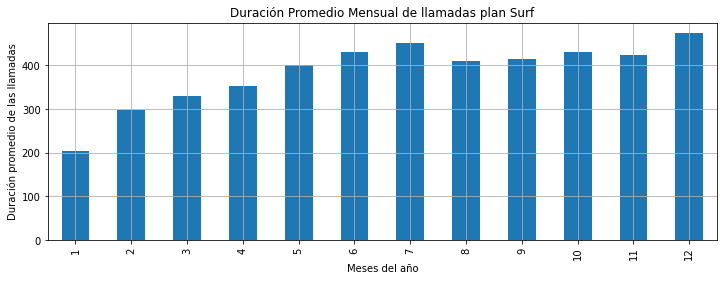

In [44]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.
subconjunto_llamadas= usuarios[['month','duration','plan']]

#Plan Surf
subconjunto_llamadas_1= subconjunto_llamadas[(subconjunto_llamadas['plan']=='surf')]
subconjunto_llamadas_surf= subconjunto_llamadas_1.groupby('month')['duration'].mean()
subconjunto_llamadas_surf.plot(kind='bar',title= 'Duración Promedio Mensual de llamadas plan Surf',
                               grid=True,figsize=(12,4))
plt.ylabel('Duración promedio de las llamadas')
plt.xlabel('Meses del año')
plt.show()

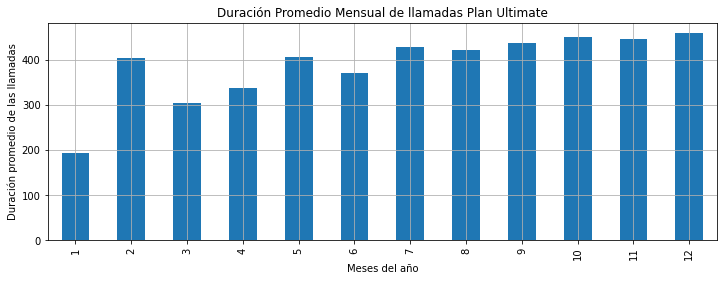

In [45]:
#Plan Ultimate
subconjunto_llamadas_2= subconjunto_llamadas[(subconjunto_llamadas['plan']=='ultimate')]
subconjunto_llamadas_ultimate= subconjunto_llamadas_2.groupby('month')['duration'].mean()
subconjunto_llamadas_ultimate.plot(kind='bar',title= 'Duración Promedio Mensual de llamadas Plan Ultimate',
                                   grid=True,figsize=(12,4))
plt.ylabel('Duración promedio de las llamadas')
plt.xlabel('Meses del año')
plt.show()

En un período de 12 meses se puede observar que los usuarios con el Plan Surf tienen una duración promedio mayor al plan ultimate en 6 de los meses del año (1-Enero, 3-Marzo, 4-Abril, 6-Junio, 7-Julio, 12-Diciembre) El resto de los meses es el Plan Ultimate el que tiene los mayores promedios (2-Febrero, 5-Mayo, 8-Agosto, 9-Septiembre, 10-Octubre, 11-Noviembre)

In [46]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.
subconjunto_minutos= usuarios[['month','duration','plan']]
minutos_surf= subconjunto_minutos.query('plan =="surf"')
minutos_surf.columns= ['month','duration_surf','plan']
minutos_surf['duration_surf'].describe()

count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: duration_surf, dtype: float64

array([[<AxesSubplot:title={'center':'duration_surf'}>]], dtype=object)

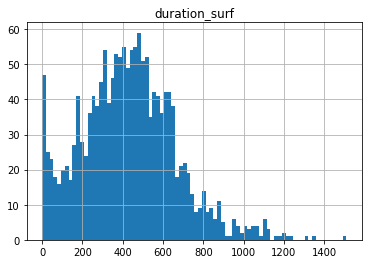

In [47]:
minutos_surf.hist('duration_surf', bins=80)

El gráfico contiene la cantidad de minutos que los usuarios requieren cada mes del plan Surf, por lo que se puede observar tenemos un pico considerable muy cerca del 0, otro cerca de los 200 minutos y la mayor cantidad está concentrada entre los 300 y 500 minutos y apartir de ahí los valores empiezan a caer, además hay algunos valores muy altos que se consideran atípicos.  

In [48]:
minutos_ultimate= subconjunto_minutos.query('plan =="ultimate"')
minutos_ultimate.columns= ['month','duration_ultimate','plan']
minutos_ultimate['duration_ultimate'].describe()

count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: duration_ultimate, dtype: float64

array([[<AxesSubplot:title={'center':'duration_ultimate'}>]], dtype=object)

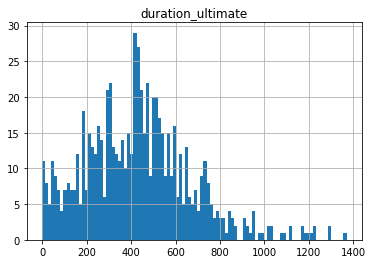

In [49]:
minutos_ultimate.hist('duration_ultimate',bins=100)

El gráfico contiene la cantidad de minutos que los usuarios requieren cada mes del plan Ultimate, por lo que se puede observar que los mayores valores están muy cerca de los 400 minutos pero inmediatamente empiezan a caer considerablemte además hay algunos valores muy altos que se consideran atípicos.  

In [50]:
# Calcula la media y la varianza de la duración mensual de llamadas.
#Plan surf

minutos_surf_mean= minutos_surf['duration_surf'].mean()
minutos_surf_variance= np.var(minutos_surf['duration_surf'])
print((f'Media de la duración de las llamadas PLAN SURF: {minutos_surf_mean}'))
print((f'Varianza de la duración de las llamadas PLAN SURF: {minutos_surf_variance}'))


Media de la duración de las llamadas PLAN SURF: 428.7495232040687
Varianza de la duración de las llamadas PLAN SURF: 54933.334591317485


Como ya se podía intuir al haber observado el histograma el promedio de minutos que requieren los clientes del plan surf es de 428.7495232040687, esta se ve afectada por los valores atípicos que tiene el conjunto de datos. Se tiene una varianza muy alta 54933.334591317485 lo que indica que se tiene una desviación estándar también alta y de hecho se pudo comprobar que es de 234.453150, esto indica que los valores están bastante dispersos. 

In [51]:
#Plan ultimate

minutos_ultimate_mean= minutos_ultimate['duration_ultimate'].mean()
minutos_ultimate_variance= np.var(minutos_ultimate['duration_ultimate'])
print((f'Media de la duración de las llamadas PLAN ULTIMATE: {minutos_ultimate_mean}'))
print((f'Varianza de la duración de las llamadas PLAN ULTIMATE: {minutos_ultimate_variance}'))

Media de la duración de las llamadas PLAN ULTIMATE: 430.45
Varianza de la duración de las llamadas PLAN ULTIMATE: 57764.125277777785


Como ya se podía intuir al haber observado el histograma el promedio de minutos que requieren los clientes del plan Ultimate es de 430.45, esta se ve afectada por los valores atípicos que tiene el conjunto de datos. Se tiene una varianza muy alta 57764.125277777785 lo que indica que se tiene una desviación estándar también alta y de hecho se pudo comprobar que es de 240.508762, esto indica que los valores están bastante dispersos. 

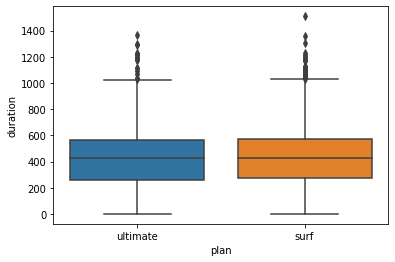

In [52]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
var='plan'
grafico_plan= sns.boxplot(x=var, y='duration', data=subconjunto_minutos)

En el diagrama de cajas y bigotes tenemos la distribución de la duración mensual de llamadas por tipo de Plan, para el plan Ultimate el valor Q1 está ubicado cerca de los 260 minutos, mientras que el Q3 cerca de los 580 minutos y una mediana ubicada muy cerca de los 400 minutos y presenta valores atípicos mayores a 1000. Para el plan Surf el valor Q1 está ubicado cerca de los 280 minutos, mientras que el Q3 cerca de los 580 minutos y una mediana ubicada muy cerca de los 400 minutos y presenta valores atípicos mayores a 1000. 

De los 500 usuarios tenemos comportamientos bastantes parecidos entre ambos planes:

1- Los clientes con el plan Surf tienen una mediana de 425 minutos al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y  por lo que se puede observar tenemos un pico considerable muy cerca del 0, otro cerca de los 200 minutos y la mayor cantidad está concentrada entre los 300 y 500 minutos y apartir de ahí los valores empiezan a caer.
2- Para el plan Surf el valor Q1 está ubicado cerca de los 280 minutos, mientras que el Q3 cerca de los 580 minutos, presenta valores atípicos mayores a 1000.

3- Los clientes con el plan Ultimate tienen una mediana de 424 minutos al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y por lo que se puede observar que los mayores valores están muy cerca de los 400 minutos pero inmediatamente empiezan a caer considerablemte. 

4- Para el plan Ultimate el valor Q1 está ubicado cerca de los 260 minutos, mientras que el Q3 cerca de los 580 minutos, presenta valores atípicos mayores a 1000

### Mensajes <a id='mensajes_usuarios'></a>

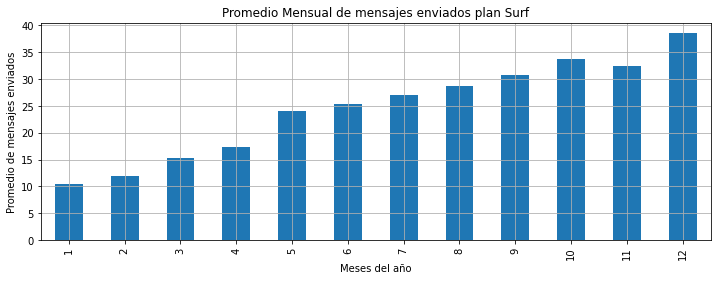

In [53]:
# Compara el número promedio de mensajes por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.
subconjunto_mensajes= usuarios[['month','messages','plan']]
#Plan Surf
subconjunto_mensajes_1= subconjunto_mensajes[(subconjunto_mensajes['plan']=='surf')]
subconjunto_mensajes_surf= subconjunto_mensajes_1.groupby('month')['messages'].mean()
subconjunto_mensajes_surf.plot(kind='bar',title= 'Promedio Mensual de mensajes enviados plan Surf',
                               grid=True,figsize=(12,4))
plt.ylabel('Promedio de mensajes enviados')
plt.xlabel('Meses del año')
plt.show()

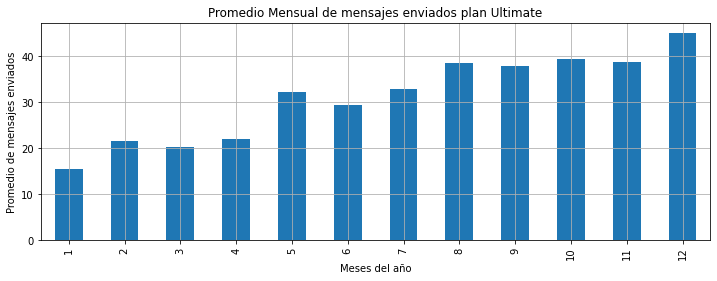

In [54]:
#Plan Ultimate
subconjunto_mensajes_2= subconjunto_mensajes[(subconjunto_mensajes['plan']=='ultimate')]
subconjunto_mensajes_ultimate= subconjunto_mensajes_2.groupby('month')['messages'].mean()
subconjunto_mensajes_ultimate.plot(kind='bar',title= 'Promedio Mensual de mensajes enviados plan Ultimate',
                                   grid=True,figsize=(12,4))
plt.ylabel('Promedio de mensajes enviados')
plt.xlabel('Meses del año')
plt.show()

En un período de 12 meses se puede observar que en todos los meses (1-Enero, 2-Febrero, 3-Marzo, 4-Abril, 5-Mayo, 6-Junio, 7-Julio 8-Agosto, 9-Septiembre, 10-Octubre, 11-Noviembre, 12-Diciembre) los usuarios del Plan Ultimate envían más mensajes que los del plan Surf ya que tiene los mayores promedios.

In [55]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
subconjunto_mensajes= usuarios[['month','messages','plan']]
mensajes_surf= subconjunto_mensajes.query('plan =="surf"')
mensajes_surf.columns= ['month','mensajes_surf','plan']
mensajes_surf['mensajes_surf'].describe()

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: mensajes_surf, dtype: float64

array([[<AxesSubplot:title={'center':'mensajes_surf'}>]], dtype=object)

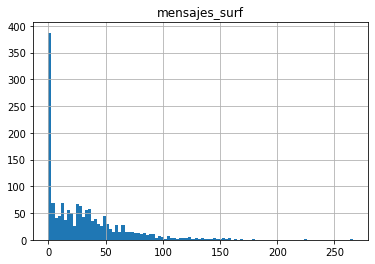

In [56]:
mensajes_surf.hist('mensajes_surf',bins=100)

El gráfico contiene mensajes que los usuarios envían cada mes del plan Surf; por lo que se puede observar que los mayores valores están muy cerca del 0 luego hay una grupo de valores donde se acumula otra gran cantidad de datos que llega hasta los 50 mensajes y apartir de ahí los valores empiezan a caer considerablemte, además hay algunos valores muy altos que se consideran atípicos. 

In [57]:
subconjunto_mensajes= usuarios[['month','messages','plan']]
mensajes_ultimate= subconjunto_mensajes.query('plan =="ultimate"')
mensajes_ultimate.columns= ['month','mensajes_ultimate','plan']
mensajes_ultimate['mensajes_ultimate'].describe()

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: mensajes_ultimate, dtype: float64

array([[<AxesSubplot:title={'center':'mensajes_ultimate'}>]], dtype=object)

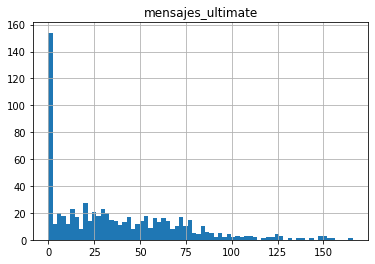

In [58]:
mensajes_ultimate.hist('mensajes_ultimate',bins=70)

El gráfico contiene mensajes que los usuarios envían cada mes del plan Ultimate; por lo que se puede observar que tenemos el pico mas alto cerca del cero, luego tenemos una cantidad de valores considerables distribuidos hasta los 80 mensajes, teniendo su pico más alto cerca de los 25; luego los valores comienzan a bajar y se pueden ver algunos valores atípicos que pasan los 150 mensajes.   

In [59]:
# Calcula la media y la varianza de la cantidad mensual de mensajes.
#Plan surf

mensajes_surf_mean= mensajes_surf['mensajes_surf'].mean()
mensajes_surf_variance= np.var(mensajes_surf['mensajes_surf'])
print((f'Media de la cantidad de mensajes con el PLAN SURF: {mensajes_surf_mean}'))
print((f'Varianza de la cantidad de mensajes con el PLAN SURF: {mensajes_surf_variance}'))


Media de la cantidad de mensajes con el PLAN SURF: 31.15956770502225
Varianza de la cantidad de mensajes con el PLAN SURF: 1126.008231726662


El promedio de mensajes que envían los clientes del plan Surf es de 31.15956770502225, esta se ve afectada por los valores atípicos que tiene el conjunto de datos. Se tiene una varianza muy alta 1126.008231726662 lo que indica que se tiene una desviación estándar también alta y de hecho se pudo comprobar que es de 33.566717, esto indica que los valores están bastante dispersos. 

In [60]:
#Plan ultimate

mensajes_ultimate_mean= mensajes_ultimate['mensajes_ultimate'].mean()
mensajes_ultimate_variance= np.var(mensajes_ultimate['mensajes_ultimate'])
print((f'Media de la cantidad de mensajes con el PLAN ULTIMATE: {mensajes_ultimate_mean}'))
print((f'Varianza de la cantidad de mensajes con el PLAN ULTIMATE: {mensajes_ultimate_variance}'))

Media de la cantidad de mensajes con el PLAN ULTIMATE: 37.55138888888889
Varianza de la cantidad de mensajes con el PLAN ULTIMATE: 1207.0779147376543


El promedio de mensajes que envían los clientes del plan Ultimate es de 37.55138888888889, esta se ve afectada por los valores atípicos que tiene el conjunto de datos. Se tiene una varianza muy alta 1207.0779147376543 lo que indica que se tiene una desviación estándar también alta y de hecho se pudo comprobar que es de 34.767179, esto indica que los valores están bastante dispersos.

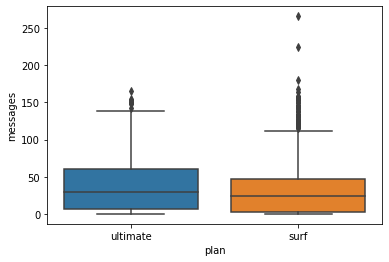

In [61]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de mensajes mensual.
var='plan'
grafico_plan= sns.boxplot(x=var, y='messages', data=subconjunto_mensajes)

En el diagrama de cajas y bigotes tenemos la distribución de la cantidad de mensajes mensuales por tipo de Plan, para el plan Ultimate el valor Q1 está ubicado cerca de los 5 mensajes, mientras que el Q3 cerca de los 60 mensajes y una mediana ubicada muy cerca de los 30 mensajes y presenta valores atípicos mayores a 140. Para el plan Surf el valor Q1 está ubicado cerca del 0, mientras que el Q3 cerca de los 25 mensajes y una mediana ubicada muy cerca de los 20 mensajes y presenta valores atípicos mayores a 110. 

De los 500 usuarios tenemos que los usuarios del plan Ultimate tienen un mayor consumo de mensajes que los usuarios delm plan Surf:

1- Los clientes con el plan Surf tienen una mediana de 24 mensajes al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y por lo que se puede observar en el histograma que los mayores valores están muy cerca del 0 luego hay una grupo de valores donde se acumula otra gran cantidad de datos que llega hasta los 50 mensajes y apartir de ahí los valores empiezan a caer considerablemte, además hay algunos valores muy altos que se consideran atípicos.

2- Para el plan Surf el valor Q1 está ubicado cerca del 0, mientras que el Q3 cerca de los 25 mensajes y presenta valores atípicos mayores a 110. 

3- Los clientes con el plan Ultimate tienen una mediana de 30 mensajes al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y por lo que se puede observar en el histograma que tenemos el pico mas alto cerca del cero, luego tenemos una cantidad de valores considerables distribuidos hasta los 80 mensajes, teniendo su pico más alto cerca de los 25; luego los valores comienzan a bajar y se pueden ver algunos valores atípicos que pasan los 150 mensajes. 

4- Para el plan Ultimate el valor Q1 está ubicado cerca de los 5 mensajes, mientras que el Q3 cerca de los 60 mensajes y presenta valores atípicos mayores a 140. 

### Internet <a id='internet_usuarios'></a>

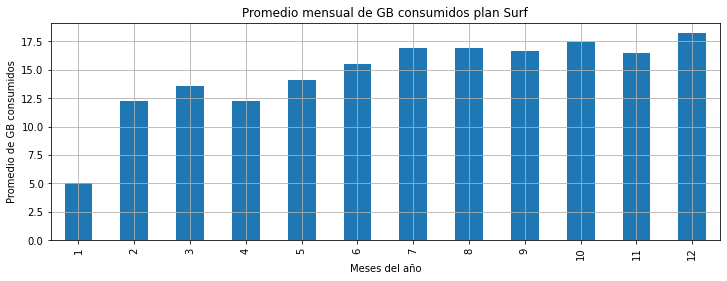

In [62]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan cada mes. 
subconjunto_internet= usuarios[['month','gb_used','plan']]

#Plan Surf
subconjunto_internet_1= subconjunto_internet[(subconjunto_internet['plan']=='surf')]
subconjunto_internet_surf= subconjunto_internet_1.groupby('month')['gb_used'].mean()
subconjunto_internet_surf.plot(kind='bar',title= 'Promedio mensual de GB consumidos plan Surf',grid=True,figsize=(12,4))
plt.ylabel('Promedio de GB consumidos')
plt.xlabel('Meses del año')
plt.show()

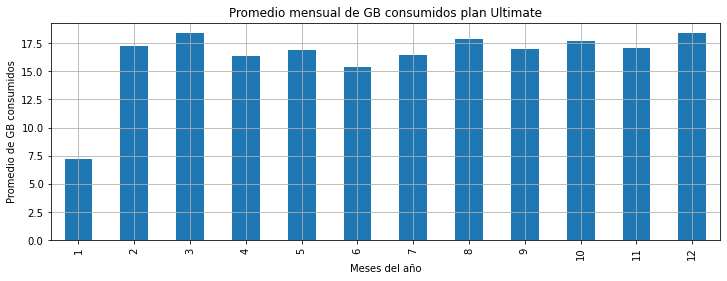

In [63]:
#Plan Ultimate
subconjunto_internet_2= subconjunto_internet[(subconjunto_internet['plan']=='ultimate')]
subconjunto_internet_ultimate= subconjunto_internet_2.groupby('month')['gb_used'].mean()
subconjunto_internet_ultimate.plot(kind='bar',title= 'Promedio mensual de GB consumidos plan Ultimate',grid=True,figsize=(12,4))
plt.ylabel('Promedio de GB consumidos')
plt.xlabel('Meses del año')
plt.show()

En un período de 12 meses se puede observar que los usuarios con el Plan Surf tienen un consumo promedio de internet(GB) mayor al plan ultimate en 2 de los meses del año (6-Junio, 7-Julio) El resto de los meses es el Plan Ultimate el que tiene los mayores promedios (1-Enero, 2-Febrero, 3-Marzo, 4-Abril, 5-Mayo, 8-Agosto, 9-Septiembre, 10-Octubre, 11-Noviembre, 12-Diciembre)

In [64]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
subconjunto_internet= usuarios[['month','gb_used','plan']]
internet_surf= subconjunto_internet.query('plan =="surf"')
internet_surf.columns= ['month','internet_surf','plan']
internet_surf['internet_surf'].describe()

count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: internet_surf, dtype: float64

array([[<AxesSubplot:title={'center':'internet_surf'}>]], dtype=object)

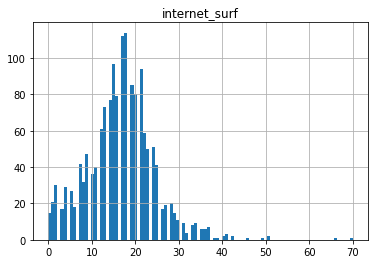

In [65]:
internet_surf.hist('internet_surf',bins=100)

El gráfico contiene la cantidad de GB que los usuarios requieren cada mes del plan Surf, por lo que se puede observar que los mayores valores están cerca de los 20 GB y apartir de ahí los valores empiezan a caer considerablemente además hay algunos valores muy altos que se consideran atípicos. 

In [66]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
subconjunto_internet= usuarios[['month','gb_used','plan']]
internet_ultimate= subconjunto_internet.query('plan =="ultimate"')
internet_ultimate.columns= ['month','internet_ultimate','plan']
internet_ultimate['internet_ultimate'].describe()

count    720.000000
mean      17.306944
std        7.670108
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: internet_ultimate, dtype: float64

array([[<AxesSubplot:title={'center':'internet_ultimate'}>]], dtype=object)

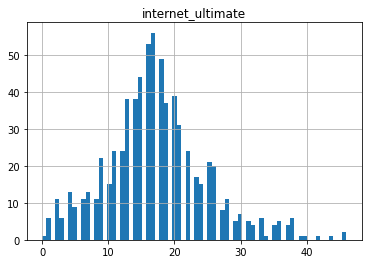

In [67]:
internet_ultimate.hist('internet_ultimate',bins=70)

El gráfico contiene la cantidad de GB que los usuarios requieren cada mes del plan Ultimate, por lo que se puede observar que tenemos una gráfica con un pico de consumo cercano a los 15 GB y apartir de ahí los valores empiezan a caer considerablemente, además hay unos pocos valores altos que se consideran atípicos. 

In [68]:
# Calcula la media y la varianza de la cantidad de tráfico de internet consumido por usuarios por plan

#Plan surf

internet_surf_mean= internet_surf['internet_surf'].mean()
internet_surf_variance= np.var(internet_surf['internet_surf'])
print((f'Media de la cantidad de tráfico de internet consumido con el PLAN SURF: {internet_surf_mean}'))
print((f'Varianza de la cantidad de tráfico de internet consumido con el PLAN SURF: {internet_surf_variance}'))


Media de la cantidad de tráfico de internet consumido con el PLAN SURF: 16.670692943420217
Varianza de la cantidad de tráfico de internet consumido con el PLAN SURF: 61.54444942447023


El promedio de GB utilizados por los clientes del plan Surf es de 16.670692943420217 este se ve afectado por los valores atípicos que tiene el conjunto de datos. Se tiene una varianza alta 61.54444942447023 lo que indica que se tiene una desviación estándar también alta y de hecho se pudo comprobar que es de 7.847522, esto indica que los valores están dispersos. 

In [69]:
#Plan ultimate

internet_ultimate_mean= internet_ultimate['internet_ultimate'].mean()
internet_ultimate_variance= np.var(internet_ultimate['internet_ultimate'])
print((f'Media de la cantidad de tráfico de internet consumido con el PLAN ULTIMATEF: {internet_ultimate_mean}'))
print((f'Varianza de la cantidad de tráfico de internet consumido con el PLAN ULTIMATE: {internet_ultimate_variance}'))


Media de la cantidad de tráfico de internet consumido con el PLAN ULTIMATEF: 17.306944444444444
Varianza de la cantidad de tráfico de internet consumido con el PLAN ULTIMATE: 58.748840663580246


El promedio de GB utilizados por los clientes del plan Ultimate es de 17.306944444444444. Se tiene una varianza alta 58.748840663580246 lo que indica que se tiene una desviación estándar también alta y de hecho se pudo comprobar que es de 7.670108, esto indica que los valores están dispersos. 

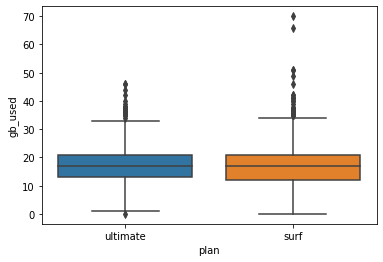

In [70]:
# Traza un diagrama de caja para visualizar la distribución de cantidad de tráfico de internet consumido por usuarios por plan
var='plan'
subconjunto_internet= usuarios[['month','gb_used','plan']]
grafico_plan= sns.boxplot(x=var, y='gb_used', data=subconjunto_internet)

En el diagrama de cajas y bigotes tenemos la distribución de la cantidad de tráfico de internet consumido por tipo de Plan, para el plan Ultimate el valor Q1 está ubicado cerca de los 13 GB, mientras que el Q3 cerca de los 20 GB y una mediana superior a los 15 GB y presenta valores atípicos mayores a 30. Para el plan Surf el valor Q1 está ubicado cerca de los 12 GB, mientras que el Q3 cerca de los 20 GB y una mediana superior a los 15 GB y presenta valores atípicos mayores a 30.

De los 500 usuarios tenemos comportamientos bastantes parecidos entre ambos planes:

1- Los clientes con el plan Surf tienen una mediana de 17 GB al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y por lo que se puede observar en el histograma que los mayores valores están cerca de los 20 GB y apartir de ahí los valores empiezan a caer considerablemente además hay algunos valores muy altos que se consideran atípicos. 

2- Para el plan Surf el valor Q1 está ubicado cerca de los 12 GB, mientras que el Q3 cerca de los 20 GB y presenta valores atípicos mayores a 30.

3- Los clientes con el plan Ultimate tienen una mediana de 17 GB al mes(se toma la mediana como referencia ya que tenemos valores atípicos pero en este caso es valor es igual a la media) y por lo que se puede observar en el histograma que tenemos una gráfica con un pico de consumo cercano a los 15 GB y apartir de ahí los valores empiezan a caer considerablemente, además hay unos pocos valores altos que se consideran atípicos. 

4- Para el plan Ultimate el valor Q1 está ubicado cerca de los 13 GB, mientras que el Q3 cerca de los 20 GB y presenta valores atípicos mayores a 30.

## Ingreso <a id='descripcion'></a>

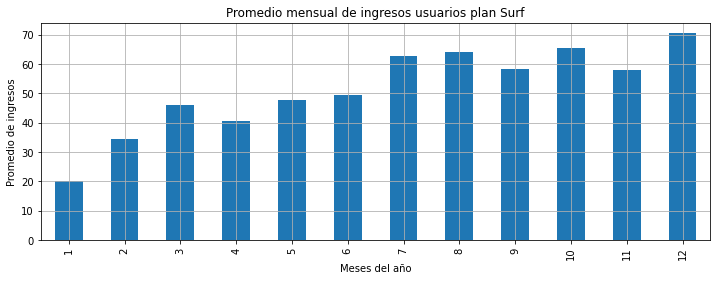

In [71]:
#Compara el promedio de ingresos por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.

subconjunto_ingresos= usuarios[['month','total_mes','plan']]

#Plan Surf
subconjunto_ingresos_1= subconjunto_ingresos[(subconjunto_ingresos['plan']=='surf')]
subconjunto_ingresos_surf= subconjunto_ingresos_1.groupby('month')['total_mes'].mean()
subconjunto_ingresos_surf.plot(kind='bar',title= 'Promedio mensual de ingresos usuarios plan Surf',
                               grid=True,figsize=(12,4))
plt.ylabel('Promedio de ingresos')
plt.xlabel('Meses del año')
plt.show()

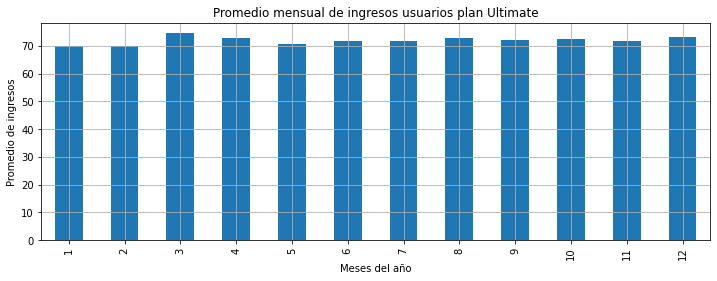

In [72]:
#Plan Ultimate
subconjunto_ingresos_2= subconjunto_ingresos[(subconjunto_ingresos['plan']=='ultimate')]
subconjunto_ingresos_ultimate= subconjunto_ingresos_2.groupby('month')['total_mes'].mean()
subconjunto_ingresos_ultimate.plot(kind='bar',title= 'Promedio mensual de ingresos usuarios plan Ultimate',
                                   grid=True,figsize=(12,4))
plt.ylabel('Promedio de ingresos')
plt.xlabel('Meses del año')
plt.show()

En un período de 12 meses se puede observar que los ingresos con el Plan Ultimate superan en promedio en todos los meses a los del plan surf. (1-Enero, 2-Febrero, 3-Marzo, 4-Abril, 5-Mayo, 6-Junio, 7-Julio, 8-Agosto, 9-Septiembre, 10-Octubre, 11-Noviembre, 12-Diciembre)

In [73]:
# Compara la cantidad ingresos por cada plan por cada mes. 

subconjunto_ingresos= usuarios[['month','total_mes','plan']]
ingresos_surf= subconjunto_ingresos.query('plan =="surf"')
ingresos_surf.columns= ['month','ingresos_surf','plan']
ingresos_surf['ingresos_surf'].describe()

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: ingresos_surf, dtype: float64

array([[<AxesSubplot:title={'center':'ingresos_surf'}>]], dtype=object)

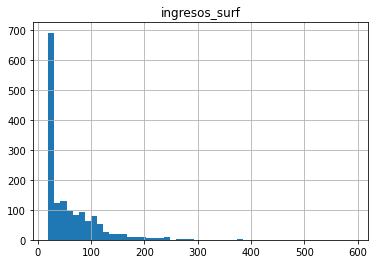

In [74]:
ingresos_surf.hist('ingresos_surf',bins=50)

El gráfico contiene la cantidad de ingresos que provienen de los usuarios del plan Surf, por lo que se puede observar que los mayores valores están cercanos al 20 y luego  a partir del 100 disminuyen aún más. Además hay algunos valores muy altos que se consideran atípicos.

In [75]:
subconjunto_ingresos= usuarios[['month','total_mes','plan']]
ingresos_ultimate= subconjunto_ingresos.query('plan =="ultimate"')
ingresos_ultimate.columns= ['month','ingresos_ultimate','plan']
ingresos_ultimate['ingresos_ultimate'].describe()

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: ingresos_ultimate, dtype: float64

array([[<AxesSubplot:title={'center':'ingresos_ultimate'}>]], dtype=object)

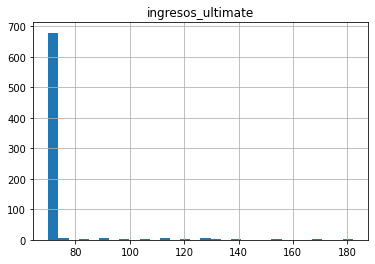

In [76]:
ingresos_ultimate.hist('ingresos_ultimate',bins=30)

El gráfico contiene la cantidad de ingresos que provienen de los usuarios del plan Ultimate, por lo que se puede observar que los mayores valores están cercanos al 40 y luego hay unos pocos valores distribuidos por el eje X. Además hay algunos valores muy altos que se consideran atípicos.

In [77]:
# Calcula la media y la varianza de la cantidad ingresos por cada plan por mes. 

#Plan surf

ingresos_surf_mean= ingresos_surf['ingresos_surf'].mean()
ingresos_surf_variance= np.var(ingresos_surf['ingresos_surf'])
print((f'Media de la cantidad ingresos por cada plan por mes con el PLAN SURF: {ingresos_surf_mean}'))
print((f'Varianza de la cantidad cantidad ingresos por cada plan por mes con el PLAN SURF: {ingresos_surf_variance}'))


Media de la cantidad ingresos por cada plan por mes con el PLAN SURF: 60.706408137317226
Varianza de la cantidad cantidad ingresos por cada plan por mes con el PLAN SURF: 3065.8848438690247


El promedio de ingresos por cliente del plan Surf es de 60.706408137317226, este se ve afectada por los valores atípicos que tiene el conjunto de datos. Se tiene una varianza alta 3065.8848438690247 lo que indica que se tiene una desviación estándar también alta y de hecho se pudo comprobar que es de 55.388042, esto indica que tenemos valores dispersos. 

In [78]:
#Plan ultimate

ingresos_ultimate_mean= ingresos_ultimate['ingresos_ultimate'].mean()
ingresos_ultimate_variance= np.var(ingresos_ultimate['ingresos_ultimate'])
print((f'Media de la cantidad ingresos por cada plan por mes con el PLAN ULTIMATE: {ingresos_ultimate_mean}'))
print((f'Varianza de la cantidad cantidad ingresos por cada plan por mes con el PLAN ULTIMATE: {ingresos_ultimate_variance}'))

Media de la cantidad ingresos por cada plan por mes con el PLAN ULTIMATE: 72.31388888888888
Varianza de la cantidad cantidad ingresos por cada plan por mes con el PLAN ULTIMATE: 129.66814043209877


El promedio de ingresos por cliente del plan Ultimate es de 72.31388888888888, este se ve afectada por los valores atípicos que tiene el conjunto de datos. Se tiene una varianza alta 129.66814043209877 lo que indica que se tiene una desviación estándar también alta y de hecho se pudo comprobar que es de 11.395108, esto indica que tenemos valores dispersos. 

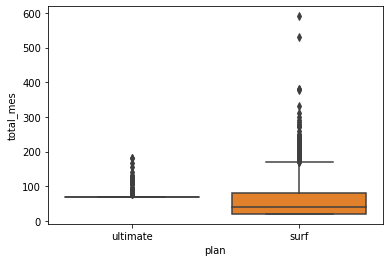

In [79]:
# Traza un diagrama de caja para visualizar la distribución de de la cantidad ingresos por cada plan por mes
var='plan'
subconjunto_ingresos= usuarios[['month','total_mes','plan']]
grafico_plan= sns.boxplot(x=var, y='total_mes', data=subconjunto_ingresos)

En el diagrama de cajas y bigotes tenemos la distribución de la cantidad de ingresos por tipo de Plan, para el plan Ultimate el valor Q1 está ubicado cerca de 70 , mientras que el Q3 también en 70 y presenta valores atípicos que son todos aquellos diferentes a 70. Para el plan Surf el valor Q1 está ubicado cerca del 20, mientras que el Q3 cerca de los 80 y presenta valores atípicos mayores a 150.

De los dos planes disponibles tenemos que el plan Ultimaste tiene un mayor ingreso que el plan Surf:

1- Los clientes con el plan Surf los usuarios tienen una mediana de ingresos de 40.360000 al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y por lo que se puede observar que los mayores valores están cercanos al 20 y luego a partir del 100 disminuyen aún más. Además hay algunos valores muy altos que se consideran atípicos.

2- Para el plan Surf el valor Q1 está ubicado cerca del 20, mientras que el Q3 cerca de los 80 y presenta valores atípicos mayores a 150.

3- Los clientes con el plan Ultimate tienen una mediana de 70.000000 al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y por lo que se puede observar en el histograma que los mayores valores están cercanos al 40 y luego hay unos pocos valores distribuidos por el eje X. Además hay algunos valores muy altos que se consideran atípicos.

4- Para el plan Ultimate el valor Q1 está ubicado cerca de 70 , mientras que el Q3 también en 70 y presenta valores atípicos que son todos aquellos diferentes a 70

## Probar las hipótesis estadísticas. <a id='hipotesis'></a>

**Hipótesis 1**

- H0: no hay diferencia entre los ingresos promedios de los usuarios de los planes de llamada Ultimate y Surf
- Ha: si hay diferencia entre los ingresos promedios de los usuarios de los planes de llamada Ultimate y Surf
- alpha = 0.05 nivel crítico de significación estadística

In [80]:
# Prueba las hipótesis
subconjunto_ingresos_hip= usuarios[['total_mes','plan']]
hip_ingresos_surf= subconjunto_ingresos_hip.query('plan =="surf"')
hip_ingresos_surf=hip_ingresos_surf['total_mes']
hip_ingresos_ultimate= subconjunto_ingresos_hip.query('plan =="ultimate"')
hip_ingresos_ultimate=hip_ingresos_ultimate['total_mes']

alpha = 0.05

results = st.ttest_ind(hip_ingresos_surf, hip_ingresos_ultimate, equal_var= False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 


p-value:  3.17039054811355e-15
Rechazamos la hipótesis nula


Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, para rechazar la hipótesis nula. Por lo tanto, podemos concluir que hay diferencia entre los ingresos promedios de los usuarios de los planes de llamada Ultimate y Surf. 

**Hipótesis 2**

- H0: El ingreso promedio de los usuarios del área NY-NJ no es diferente al de los usuarios de otras regiones
- Ha: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones
- alpha = 0.05 nivel crítico de significación estadística

In [81]:
# Prueba las hipótesis

#usuarios que viven en el área 'NY-NJ'
usuarios_city=users[users["city"].apply(lambda x: 'NY-NJ'in x)]
sub_usuarios_city= usuarios_city[['user_id','city']]
sub_usuarios_ingresos=usuarios[['user_id','total_mes']]
tabla_usuarios_city= pd.merge(sub_usuarios_ingresos, sub_usuarios_city, on='user_id')
tabla_usuarios_city=tabla_usuarios_city['total_mes']

#usuarios que  no viven en el área 'NY-NJ'
usuarios_city_2=users[users["city"].apply(lambda x: 'NY-NJ' not in x)]
sub_usuarios_city_2= usuarios_city_2[['user_id','city']]
sub_usuarios_ingresos_2=usuarios[['user_id','total_mes']]
tabla_usuarios_city_2= pd.merge(sub_usuarios_ingresos_2, sub_usuarios_city_2, on='user_id')
tabla_usuarios_city_2=tabla_usuarios_city_2['total_mes']

alpha = 0.05

results = st.ttest_ind(tabla_usuarios_city, tabla_usuarios_city_2, equal_var= False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 


p-value:  0.033525615885300314
Rechazamos la hipótesis nula


Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, para rechazar la hipótesis nula. Por lo tanto, podemos concluir que hay diferencia entre los ingresos promedios de los usuarios del área NY-NJ y el resto de lugares del país.

## Conclusión general <a id='general'></a>

 El estudio se basó en el analisis de 5 Datasets: plans, users, calls, messages, internet; en líneas generales el conjunto de datos no tenía una gran cantidad de valores problemáticos que debieron ser solventados.
 
 La tabla users tenía valores ausentes en la columna churn_date estos no se reemplazaron ya que se podía intuir que los clientes que tenían valores nulos es porque eran usuarios activos al momento de la toma de la muestra, además de cambiaron los tipos de datos de las columnas 'reg_date' y 'churn_date' al tipo datetime y por ultimo se agregó la columna situación donde se especifica si el cliente está activo o no, esta puede ser útil para posteriores análisis. 
 
 La tabla calls no tenía valores ausentes y solo se cambió el tipo de dato de la columna call_date al tipo Datetime, la duración se redondeó hacia arriba ya que la compañía redondea los segundos a minutos, está columna también cambió su tipo de dato a int y por último se agregó la columna month para enriquecer los datos y utilizarla para un posterior análisis. 
 
 La tabla messages no tenía valores ausentes, solo se cambió el tipo de dato de la columna message_date al tipo Datetime y se agregó la columna month para enriquecer los datos y utilizarla para un posterior análisis.
 
 La tabla internet no tenía valores ausentes, se cambió tipo de dato de la columna session_date al tipo Datetime y se agregó la columna month para enriquecer los datos y utilizarla para un posterior análisis.
 
 Se procedió a crear una nueva tabla que contiene todos los datos de los usuarios por mes, la tabla final contiene las siguientes columnas:user_id, month, calls, duration, messages, gb_used, plan, usd_monthly_pay, minutos_incluidos, mensajes_incluidos, gb_incluidos, dif_minutos, dif_mensajes, dif_gb, recargo_minutos, recargo_mensajes, recargo_gb, total_mes. 
 
 **Luego del análisis de los datos se puede concluir lo siguiente:**
 
**De los 500 usuarios tenemos comportamientos bastantes parecidos en cuanto a las llamadas entre ambos planes ya que:**

1- En un período de 12 meses se puede observar que los usuarios con el Plan Surf tienen una duración promedio mayor al plan ultimate en 6 de los meses del año (1-Enero, 3-Marzo, 4-Abril, 6-Junio, 7-Julio, 12-Diciembre) El resto de los meses es el Plan Ultimate el que tiene los mayores promedios (2-Febrero, 5-Mayo, 8-Agosto, 9-Septiembre, 10-Octubre, 11-Noviembre).

2- Los clientes con el plan Surf tienen una mediana de 425 minutos al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y  por lo que se puede observar tenemos un pico considerable muy cerca del 0, otro cerca de los 200 minutos y la mayor cantidad está concentrada entre los 300 y 500 minutos y apartir de ahí los valores empiezan a caer.

3- Los clientes con el plan Ultimate tienen una mediana de 424 minutos al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y por lo que se puede observar que los mayores valores están muy cerca de los 400 minutos pero inmediatamente empiezan a caer considerablemente

4- Para el plan Surf el valor Q1 está ubicado cerca de los 280 minutos, mientras que el Q3 cerca de los 580 minutos, presenta valores atípicos mayores a 1000. 

5- Para el plan Ultimate el valor Q1 está ubicado cerca de los 260 minutos, mientras que el Q3 cerca de los 580 minutos, presenta valores atípicos mayores a 1000.
 

**De los 500 usuarios tenemos que los usuarios del plan Ultimate tienen un mayor consumo de mensajes que los plan Surf ya que:**

1- En un período de 12 meses se puede observar que en todos los meses (1-Enero, 2-Febrero, 3-Marzo, 4-Abril, 5-Mayo, 6-Junio, 7-Julio 8-Agosto, 9-Septiembre, 10-Octubre, 11-Noviembre, 12-Diciembre) los usuarios del Plan Ultimate envían más mensajes que los del plan Surf ya que tiene los mayores promedios.
 
2- Los clientes con el plan Surf tienen una mediana de 24 mensajes al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y por lo que se puede observar en el histograma que los mayores valores están muy cerca del 0 luego hay una grupo de valores donde se acumula otra gran cantidad de datos que llega hasta los 50 mensajes y apartir de ahí los valores empiezan a caer considerablemte.

3- Los clientes con el plan Ultimate tienen una mediana de 30 mensajes al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y por lo que se puede observar en el histograma que tenemos el pico mas alto cerca del cero, luego tenemos una cantidad de valores considerables distribuidos hasta los 80 mensajes, teniendo su pico más alto cerca de los 25; luego los valores comienzan a bajar y se pueden ver algunos valores atípicos que pasan los 150 mensajes. 

4- Para el plan Surf el valor Q1 está ubicado cerca del 0, mientras que el Q3 cerca de los 25 mensajes y presenta valores atípicos mayores a 110.

5- Para el plan Ultimate el valor Q1 está ubicado cerca de los 5 mensajes, mientras que el Q3 cerca de los 60 mensajes y presenta valores atípicos mayores a 140. 

**De los 500 usuarios tenemos comportamientos bastantes parecidos en el consumo de internet entre ambos planes:**

1- En un período de 12 meses se puede observar que los usuarios con el Plan Surf tienen un consumo promedio de internet(GB) mayor al plan ultimate en 2 de los meses del año (6-Junio, 7-Julio) El resto de los meses es el Plan Ultimate el que tiene los mayores promedios (1-Enero, 2-Febrero, 3-Marzo, 4-Abril, 5-Mayo, 8-Agosto, 9-Septiembre, 10-Octubre, 11-Noviembre, 12-Diciembre).

2- Los clientes con el plan Surf tienen una mediana de 17 GB al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y por lo que se puede observar en el histograma que los mayores valores están cerca de los 20 GB y apartir de ahí los valores empiezan a caer considerablemente. 

3- Los clientes con el plan Ultimate tienen una mediana de 17 GB al mes(se toma la mediana como referencia ya que tenemos valores atípicos pero en este caso es valor es igual a la media) y por lo que se puede observar en el histograma que tenemos una gráfica con un pico de consumo cercano a los 15 GB y apartir de ahí los valores empiezan a caer considerablemente, además hay unos pocos valores altos que se consideran atípicos.

4- Para el plan Surf el valor Q1 está ubicado cerca de los 12 GB, mientras que el Q3 cerca de los 20 GB y presenta valores atípicos mayores a 30.

5- Para el plan Ultimate el valor Q1 está ubicado cerca de los 13 GB, mientras que el Q3 cerca de los 20 GB y presenta valores atípicos mayores a 30. 

**De los dos planes disponibles tenemos que el plan Surf tiene un mayor ingreso que el plan Ultimate:**

1- En un período de 12 meses se puede observar que los ingresos con el Plan Ultimate superan en promedio en todos los meses a los del plan surf. (1-Enero, 2-Febrero, 3-Marzo, 4-Abril, 5-Mayo, 6-Junio, 7-Julio, 8-Agosto, 9-Septiembre, 10-Octubre, 11-Noviembre, 12-Diciembre)

2- Los clientes con el plan Surf los usuarios tienen una mediana de ingresos de 40.360000 al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y por lo que se puede observar que los mayores valores están cercanos al 20 y luego a partir del 100 disminuyen aún más.

3- Los clientes con el plan Ultimate tienen una mediana de 70.000000 al mes(se toma la mediana como referencia ya que tenemos valores atípicos) y por lo que se puede observar en el histograma que los mayores valores están cercanos al 40 y luego hay unos pocos valores distribuidos por el eje X. 

4- Para el plan Surf el valor Q1 está ubicado cerca del 20, mientras que el Q3 cerca de los 80 y presenta valores atípicos mayores a 150.

5- Para el plan Ultimate el valor Q1 está ubicado cerca de 70 , mientras que el Q3 también en 70 y presenta valores atípicos que son todos aquellos diferentes a 70.

**Se formularon las siguientes hipótesis estadísticas:**

1-  - H0: no hay diferencia entre los ingresos promedios de los usuarios de los planes de llamada Ultimate y Surf.
    - Ha: si hay diferencia entre los ingresos promedios de los usuarios de los planes de llamada Ultimate y Surf.
    - alpha = 0.05 nivel crítico de significación estadística.

Se realizó la prueba T-TEST con el método scipy.stats.ttest_ind(array1, array2, equal_var) paara probar la hipótesis de que las medias de dos poblaciones estadísticas son iguales según las muestras tomadas de ellas. 

Y se concluyó lo siguiente:

Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, para rechazar la hipótesis nula. Por lo tanto, podemos concluir que hay diferencia entre los ingresos promedios de los usuarios de los planes de llamada Ultimate y Surf.

2-  - H0: El ingreso promedio de los usuarios del área NY-NJ no es diferente al de los usuarios de otras regiones
    - Ha: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones
    - alpha = 0.05 nivel crítico de significación estadística.
    
Se realizó la prueba T-TEST con el método scipy.stats.ttest_ind(array1, array2, equal_var) paara probar la hipótesis de que las medias de dos poblaciones estadísticas son iguales según las muestras tomadas de ellas.

Y se concluyó lo siguiente:

Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, para rechazar la hipótesis nula. Por lo tanto, podemos concluir que hay diferencia entre los ingresos promedios de los usuarios del área NY-NJ y el resto de lugares del país.

